In [102]:
import pandas as pd 
import matplotlib.pyplot as plt 
from collections import Counter

# set this si the graph opens internally 
%matplotlib inline  

In [103]:
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv',sep='\t')
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


In [104]:
#chipo.groupby('item_name')['quantity'].sum() # or 
top5 =chipo.groupby('item_name').agg({
    'quantity' : 'sum'
}).sort_values(by = 'quantity',ascending = False).iloc[:5] # or [:5]
top5


,quantity
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386
Canned Soft Drink,351


<Axes: xlabel='item_name'>

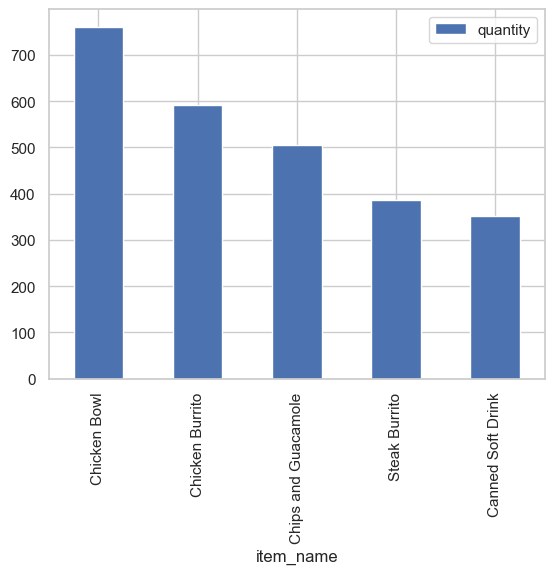

In [105]:
top5.plot( kind = 'bar')

## ==>> method 2 for getting top5


In [106]:
# # Sort DataFrame by 'quantity' in descending order and select top 5 items
# group = chipo.groupby('item_name').sum()
# top_items = group.nlargest(5,'quantity')
# top_items

# plt.figure(figsize=(10,6))
# plt.bar(top_items['item_name'], top_items['quantity'], color='skyblue')
# plt.xlabel('Items')
# plt.ylabel('Quantity')
# plt.title('Top 5 Items Bought')
# plt.xticks(rotation = 45)
# plt.tight_layout()
# plt.show()


## ** method 3 


In [107]:
# import seaborn as sns

# group = chipo.groupby('item_name').sum()
# top_items = group.nlargest(5,'quantity')
# top_items.reset_index()


# #set the style 
# sns.set_theme(style='whitegrid')

# #initialize matplot fiqure 
# plt.figure(figsize=(10,6))

# #create the bar plot using seasborn 
# sns.barplot(x=top_items['item_name'], y=top_items['quantity'],data=top_items,palette='viridis')

### Step 6. Create a scatterplot with the number of items orderered per order price
#### Hint: Price should be in the X-axis and Items ordered in the Y-axis

(0.0, 36.7)

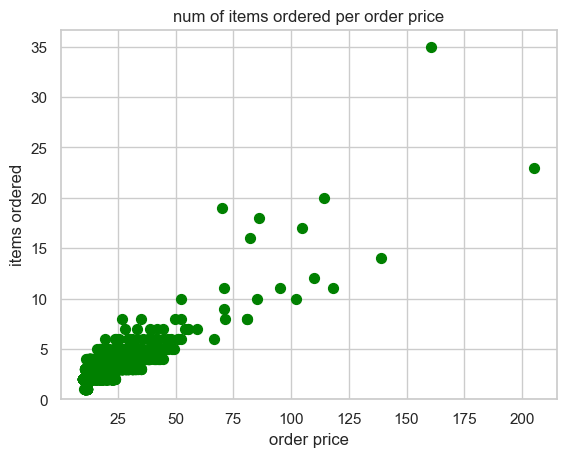

In [108]:
chipo.item_price =[ float(value[1:-1]) for value in chipo.item_price]  #strip the dollar sign at 0 position 

orders = chipo.groupby('order_id').sum()
plt.scatter(x=orders.item_price, y=orders.quantity, s = 50, c='green')

plt.xlabel('order price')
plt.ylabel('items ordered')
plt.title('num of items ordered per order price')
plt.ylim(0) # the y line starts from zero not -ve numbers 